In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('/Users/fixit/Desktop/iejra2lsq_flt.fits')
fits.info(image_file)

# This is pretty much just coppied and pasted from the guide 

Filename: \Users\fixit\Desktop\iejra2lsq_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     298   ()      
  1  SCI           1 ImageHDU       176   (513, 512)   float32   
  2  ERR           1 ImageHDU        48   (513, 512)   float32   
  3  DQ            1 ImageHDU        40   (513, 512)   int16   
  4  D2IMARR       1 ImageHDU        16   (64, 32)   float32   
  5  D2IMARR       2 ImageHDU        16   (64, 32)   float32   
  6  WCSDVARR      1 ImageHDU        16   (64, 32)   float32   
  7  WCSDVARR      2 ImageHDU        16   (64, 32)   float32   


(512, 513)


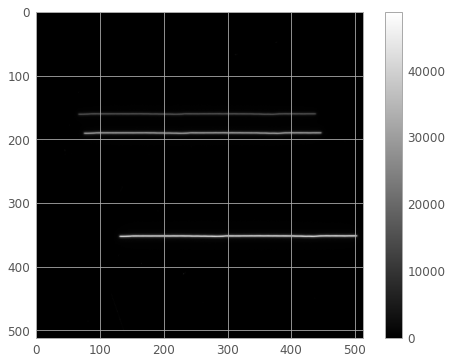

In [2]:
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

#This is also pretty much just coppied and pasted

In [3]:
image_file = get_pkg_data_filename('/Users/fixit/Desktop/iejra2lsq_flt.fits')
hdul = fits.open(image_file)
hdul[0].header

#This is courtesy of Maura

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2021-09-27' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    7 / Number of standard extensions                  
FILENAME= 'iejra2lsq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [4]:
expstart = hdul[0].header['EXPSTART']
expend = hdul[0].header['EXPEND']
exptime = hdul[0].header['EXPTIME']

#Ths is courtesy of Trevor, but I had to change it from 'hdulist' to 'hdul'

In [5]:
print(expstart, expend, exptime) #This is just to check that it worked :)

59483.63769035 59483.63794496 22.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pickle
import glob
from astropy.io import fits
import warnings
warnings.filterwarnings("ignore")
from astropy.visualization import simple_norm
import matplotlib.patches as patches

### personally developed pipeline scripts
import wfc3_extract

### set-up graphs for publication
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 6
plt.rcParams['font.size'] = '18'

In [7]:
 fpath = '/Users/fixit/Desktop/Python'

In [8]:
### 1) to run extraction script for first time
'''
MJD_UTC, flux, flux_err, raDeg, decDeg, scidata_0, scidata, xybox = wfc3_extract.wfc3_extract()
BJD_TDB_f = mjd_bjd.mjd_bjd(MJD_UTC, flux, flux_err, raDeg, decDeg)
'''

'\nMJD_UTC, flux, flux_err, raDeg, decDeg, scidata_0, scidata, xybox = wfc3_extract.wfc3_extract()\nBJD_TDB_f = mjd_bjd.mjd_bjd(MJD_UTC, flux, flux_err, raDeg, decDeg)\n'

In [9]:
###View NDR of first image of first visit

# Create an ImageNormalize object
norm = simple_norm(scidata_0, 'sqrt', min_cut=0)

# Display the image
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(scidata_0, origin='lower', norm=norm)

#First order spectra search
rect1 = patches.Rectangle((xybox[0],xybox[2]),(xybox[1]-xybox[0]),(xybox[3]-xybox[2]), 
                          fill=False, ec='r', linewidth=2)
rect2 = patches.Rectangle((100,160),(170),(210), fill=False, ec='r', linewidth=2)
#Background region
rect3 = patches.Rectangle((15,xybox[3]+50),(485),(50), fill=False, ec='y', linewidth=2)

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)

fig.colorbar(im, label='Electrons')
ax.set_xlabel('Dispersion direction', fontsize=18)
ax.set_ylabel('Scanning direction', fontsize=18)
fig.show()

NameError: name 'scidata_0' is not defined